In [1]:
# Importing necessary libraries

# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.12.0


In [2]:
# Data Set location in the local machine
dataset_dir = 'E:/OneDrive - TUNI.fi/Tampere University (MSc in CS-DS)/Year 2/Period 4/DATA.ML.200 Pattern Recognition and Machine Learning/Exercise_3/Data/GTSRB_subset_2'

In [3]:
# Defining some properties for the image
batch_size = 32
img_height = 64
img_width = 64

### Split data into two parts - 80% for training and 20% for testing.¶

In [4]:
# Training Data
train_ds = tf.keras.utils.image_dataset_from_directory(
  dataset_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  label_mode="categorical")

Found 660 files belonging to 2 classes.
Using 528 files for training.


In [5]:
## Testing Data
test_ds = tf.keras.utils.image_dataset_from_directory(
  dataset_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  label_mode="categorical")

Found 660 files belonging to 2 classes.
Using 132 files for validation.


In [6]:
# Checking the class names 
class_names = train_ds.class_names
print(class_names)

['class1', 'class2']


In [7]:
# Checking image properties
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 64, 64, 3)
(32, 2)


In [8]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [9]:
# Normalizing training dataset
normalized_train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
train_image_batch, train_labels_batch = next(iter(normalized_train_ds))
first_image = train_image_batch[0]

# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.03137255 0.5529412


In [10]:
# # Normalizing test dataset
normalized_test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))
test_image_batch, test_labels_batch = next(iter(normalized_test_ds))
first_image = test_image_batch[0]

# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.027450982 0.7490196


### Model:

In [11]:
# declare input shape 
input = tf.keras.Input(shape=(64,64,3))

# Block 1 (convolution)
conv1 = tf.keras.layers.Conv2D(10, 3, strides=2, activation="relu")(input)


# Maxpooling 1
max_p1 = tf.keras.layers.MaxPooling2D(2)(conv1)

# Block 2 (convolution)
conv2 = tf.keras.layers.Conv2D(10, 3, strides=2, activation="relu")(max_p1)

# Maxpooling 2
max_p2 = tf.keras.layers.MaxPooling2D(2)(conv2)

# Block 3 (full connected)
fc = tf.keras.layers.Flatten()(max_p2)

# Finally, we add a classification layer.
output = tf.keras.layers.Dense(2, activation="sigmoid")(fc)

# bind all
cnn_model = tf.keras.Model(input, output)



In [12]:
# This loss takes care of one-hot encoding (see https://keras.io/api/losses/)
loss_fn = tf.keras.losses.BinaryCrossentropy(from_logits=True)

cnn_model.compile(loss=loss_fn, optimizer="SGD", metrics=["accuracy"])
cnn_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 31, 31, 10)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 10)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 10)          910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 3, 3, 10)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 90)                0     

In [13]:
history = cnn_model.fit(normalized_train_ds, epochs=20)

Epoch 1/20


C:\Users\mahad\anaconda3\envs\DATAML200\lib\site-packages\keras\backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


17/17 [==============================] - 2s 23ms/step - loss: 0.6893 - accuracy: 0.5284
Epoch 2/20
17/17 [==============================] - 1s 25ms/step - loss: 0.6725 - accuracy: 0.7386
Epoch 3/20
17/17 [==============================] - 1s 24ms/step - loss: 0.6624 - accuracy: 0.7027
Epoch 4/20
17/17 [==============================] - 1s 26ms/step - loss: 0.6531 - accuracy: 0.6970
Epoch 5/20
17/17 [==============================] - 1s 26ms/step - loss: 0.6447 - accuracy: 0.6780
Epoch 6/20
17/17 [==============================] - 1s 24ms/step - loss: 0.6370 - accuracy: 0.6780
Epoch 7/20
17/17 [==============================] - 1s 23ms/step - loss: 0.6292 - accuracy: 0.6818
Epoch 8/20
17/17 [==============================] - 1s 24ms/step - loss: 0.6211 - accuracy: 0.6818
Epoch 9/20
17/17 [==============================] - 1s 25ms/step - loss: 0.6119 - accuracy: 0.6799
Epoch 10/20
17/17 [==============================] - 1s 24ms/step - loss: 0.6024 - accuracy: 0.7008
Epoch 11/20
17/17 [=

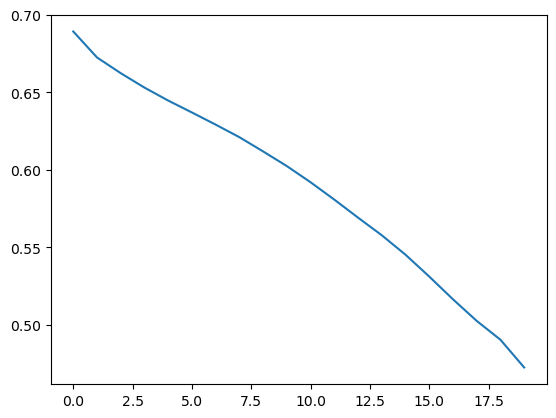

In [14]:
plt.plot(history.history['loss'])

In [15]:
result = cnn_model.evaluate(normalized_test_ds)
print("Test loss, Test accuracy : ", result)

5/5 [==============================] - 0s 8ms/step - loss: 0.4648 - accuracy: 0.8258
Test loss, Test accuracy :  [0.4648452401161194, 0.8257575631141663]
